# Make LV1 Dataset - hd5
---

In [1]:
!pip install h5py
!pip install tqdm

In [2]:
import h5py
import os
import glob
import numpy as np
import cv2
from tqdm import tqdm

## Building
---

### A. 파일 경로 설정

In [2]:
# 개인 디렉토리 구조에 맞게 변경하여 주세요
DATA_DIR = os.path.join(os.getenv('HOME'), 'workspace/Hackerton/RSI_OP_NIA_AIHUB/buildings')

TRAIN_IMG_DIR = os.path.join(DATA_DIR, 'training/raw')
TRAIN_LABEL_DIR = os.path.join(DATA_DIR, 'training/label')
VAL_IMG_DIR = os.path.join(DATA_DIR, 'validation/raw')
VAL_LABEL_DIR = os.path.join(DATA_DIR, 'validation/label')

In [3]:
# ./list 하위에 train/val/test 데이터 정보(txt)가 있어야 합니다.
b_datset_list_path = {
    'train': './list/B_train_list.txt',
    'val': './list/B_val_list.txt',
    'test': './list/B_test_list.txt'
}

In [4]:
def read_file_path(path_list):
    file_path_dict = {}
    for key, path in path_list.items():
        with open(path, 'r') as f:
            IMG_BASE_PATH = VAL_IMG_DIR if key == 'test' else TRAIN_IMG_DIR
            LABEL_BASE_PATH = VAL_LABEL_DIR if key == 'test' else TRAIN_LABEL_DIR
            
            _list = f.readlines()
            _list = [ file_path.split("\n")[0] for file_path in _list]
            img_list = [ f'{IMG_BASE_PATH}/{file_path}' for file_path in _list]
            label_list = [ f'{LABEL_BASE_PATH}/{file_path}' for file_path in _list]
            
            file_path_dict[key] = {'img': img_list, 'label': label_list}
    return file_path_dict

b_datset_list = read_file_path(b_datset_list_path)

In [5]:
b_datset_list['train']['img'][:5], b_datset_list['train']['label'][:5]

(['/home/aiffel-dj1/workspace/Hackerton/RSI_OP_NIA_AIHUB/buildings/training/raw/BLD00001_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj1/workspace/Hackerton/RSI_OP_NIA_AIHUB/buildings/training/raw/BLD00002_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj1/workspace/Hackerton/RSI_OP_NIA_AIHUB/buildings/training/raw/BLD00004_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj1/workspace/Hackerton/RSI_OP_NIA_AIHUB/buildings/training/raw/BLD00008_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj1/workspace/Hackerton/RSI_OP_NIA_AIHUB/buildings/training/raw/BLD00011_PS3_K3A_NIA0276.png'],
 ['/home/aiffel-dj1/workspace/Hackerton/RSI_OP_NIA_AIHUB/buildings/training/label/BLD00001_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj1/workspace/Hackerton/RSI_OP_NIA_AIHUB/buildings/training/label/BLD00002_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj1/workspace/Hackerton/RSI_OP_NIA_AIHUB/buildings/training/label/BLD00004_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj1/workspace/Hackerton/RSI_OP_NIA_AIHUB/buildings/training/label/BLD00008_PS3_K3A_NIA027

In [6]:
print(f'num of buildings train: {len(b_datset_list["train"]["img"])}')
print(f'num of buildings validation: {len(b_datset_list["val"]["img"])}')
print(f'num of buildings test: {len(b_datset_list["test"]["img"])}\n')

num of buildings train: 1088
num of buildings validation: 150
num of buildings test: 159



In [7]:
train_shape = (len(b_datset_list["train"]["img"]), 1024, 1024, 3)
val_shape = (len(b_datset_list["val"]["img"]), 1024, 1024, 3)
test_shape = (len(b_datset_list["test"]["img"]), 1024, 1024, 3)
train_shape, val_shape, test_shape

((1088, 1024, 1024, 3), (150, 1024, 1024, 3), (159, 1024, 1024, 3))

### B. hdf5 파일 생성
hdf5 구성
 - group : train
    - dataset : img
    - dataset : label
- group : val
    - dataset : img
    - dataset : label
- group : test
    - dataset : img
    - dataset : label

In [9]:
with h5py.File('./LV1_PNG_DATASET_B.h5', 'w') as h5:
    for key in ['train', 'val', 'test']:  
        # create building train dataset
        group = h5.create_group(key)
        shape = (len(b_datset_list[key]["img"]), 1024, 1024, 3)
        group.create_dataset('img', shape, np.uint8)
        group.create_dataset('label', shape, np.uint8)

        # write the images
        for i in tqdm(range(shape[0]), desc=f'Write {key} image'):
            img = cv2.cvtColor(cv2.imread(b_datset_list[key]["img"][i]), cv2.COLOR_BGR2RGB)
            label = cv2.cvtColor(cv2.imread(b_datset_list[key]["label"][i]), cv2.COLOR_BGR2RGB)
            group['img'][i, ...] = img
            group['label'][i, ...] = label

Write test image: 100%|██████████| 159/159 [00:07<00:00, 20.95it/s]


### C. TEST

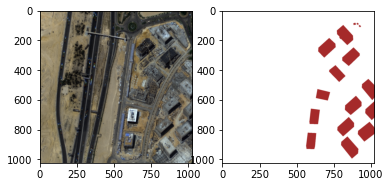

In [13]:
import matplotlib.pyplot as plt

with h5py.File('./LV1_PNG_DATASET_B.h5', 'r') as hdf5_file:
    plt.subplot(121)
    plt.imshow(hdf5_file['train']['img'][10])
    plt.subplot(122)
    plt.imshow(hdf5_file['train']['label'][10])
    plt.show()

## Road
---

### A. 파일 경로 설정

In [19]:
# 개인 디렉토리 구조에 맞게 변경하여 주세요
DATA_DIR = os.path.join(os.getenv('HOME'), 'workspace/Hackerton/RSI_OP_NIA_AIHUB/roads')
ROOT_DIR = os.path.join(os.getenv('HOME'), 'workspace/Hackerton/RSI_OP_NIA_AIHUB')

# 제공된 데이터는 train, validation이나 우리는 train에서 train, val dataset을 얻고 validation을 test로 취급하기로 했다. 
# input path는 train과 validation에 맞춰서 넣어주면 된다. 

TRAIN_IMG_DIR = os.path.join(DATA_DIR, 'training/raw')
TRAIN_LABEL_DIR = os.path.join(DATA_DIR, 'new_label/training/lv1_tr_val')
VAL_IMG_DIR = os.path.join(DATA_DIR, 'validation/raw')
VAL_LABEL_DIR = os.path.join(DATA_DIR, 'new_label/test/lv1')

In [20]:
# ./list 하위에 train/val/test 데이터 정보(txt)가 있어야 합니다.
r_datset_list_path = {
    'train': os.path.join(ROOT_DIR,'list/R_train_list.txt'),
    'val': os.path.join(ROOT_DIR, 'list/R_val_list.txt'),
    'test': os.path.join(ROOT_DIR,'list/R_test_list.txt')
}
r_datset_list_path

{'train': '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/list/R_train_list.txt',
 'val': '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/list/R_val_list.txt',
 'test': '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/list/R_test_list.txt'}

In [21]:
def read_file_path(path_list):
    file_path_dict = {}
    for key, path in path_list.items():
        with open(path, 'r') as f:
            IMG_BASE_PATH = VAL_IMG_DIR if key == 'test' else TRAIN_IMG_DIR
            LABEL_BASE_PATH = VAL_LABEL_DIR if key == 'test' else TRAIN_LABEL_DIR
            
            _list = f.readlines()
            _list = [ file_path.split("\n")[0] for file_path in _list]
            img_list = [ f'{IMG_BASE_PATH}/{file_path}' for file_path in _list]
            label_list = [ f'{LABEL_BASE_PATH}/{file_path}' for file_path in _list]
            
            file_path_dict[key] = {'img': img_list, 'label': label_list}
    return file_path_dict

r_datset_list = read_file_path(r_datset_list_path)

In [22]:
r_datset_list['train']['img'][:3], r_datset_list['train']['label'][:3]

(['/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/training/raw/BLD00001_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/training/raw/BLD00003_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/training/raw/BLD00006_PS3_K3A_NIA0276.png'],
 ['/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/new_label/training/lv1_tr_val/BLD00001_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/new_label/training/lv1_tr_val/BLD00003_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/new_label/training/lv1_tr_val/BLD00006_PS3_K3A_NIA0276.png'])

In [23]:
r_datset_list['val']['img'][:3], r_datset_list['val']['label'][:3]

(['/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/training/raw/BLD00019_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/training/raw/BLD00038_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/training/raw/BLD00055_PS3_K3A_NIA0276.png'],
 ['/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/new_label/training/lv1_tr_val/BLD00019_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/new_label/training/lv1_tr_val/BLD00038_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/new_label/training/lv1_tr_val/BLD00055_PS3_K3A_NIA0276.png'])

In [24]:
r_datset_list['test']['img'][:3], r_datset_list['test']['label'][:3]

(['/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/validation/raw/BLD00002_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/validation/raw/BLD00010_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/validation/raw/BLD00029_PS3_K3A_NIA0276.png'],
 ['/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/new_label/test/lv1/BLD00002_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/new_label/test/lv1/BLD00010_PS3_K3A_NIA0276.png',
  '/home/aiffel-dj15/workspace/Hackerton/RSI_OP_NIA_AIHUB/roads/new_label/test/lv1/BLD00029_PS3_K3A_NIA0276.png'])

In [25]:
print(f'num of roads train: {len(r_datset_list["train"]["img"])}')
print(f'num of roads validation: {len(r_datset_list["val"]["img"])}')
print(f'num of roads test: {len(r_datset_list["test"]["img"])}\n')

num of roads train: 1024
num of roads validation: 120
num of roads test: 126



In [26]:
train_shape = (len(r_datset_list["train"]["img"]), 1024, 1024, 3)
val_shape = (len(r_datset_list["val"]["img"]), 1024, 1024, 3)
test_shape = (len(r_datset_list["test"]["img"]), 1024, 1024, 3)
train_shape, val_shape, test_shape

((1024, 1024, 1024, 3), (120, 1024, 1024, 3), (126, 1024, 1024, 3))

### B. hdf5 파일 생성
hdf5 구성
 - group : train
    - dataset : img
    - dataset : label
- group : val
    - dataset : img
    - dataset : label
- group : test
    - dataset : img
    - dataset : label

In [28]:
with h5py.File('./LV1_PNG_DATASET_R.h5', 'w') as h5:
    for key in ['train', 'val', 'test']:  
        # create building train dataset
        group = h5.create_group(key)
        shape = (len(r_datset_list[key]["img"]), 1024, 1024, 3)
        group.create_dataset('img', shape, np.uint8)
        group.create_dataset('label', shape, np.uint8)
        
        # write the images
        for i in tqdm(range(shape[0]), desc=f'Write {key} image'):
            img = cv2.cvtColor(cv2.imread(r_datset_list[key]["img"][i]), cv2.COLOR_BGR2RGB)
            #print(r_datset_list[key]["label"][i])
            label = cv2.cvtColor(cv2.imread(r_datset_list[key]["label"][i]), cv2.COLOR_BGR2RGB)
            group['img'][i, ...] = img
            group['label'][i, ...] = label

Write test image: 100%|██████████| 126/126 [00:05<00:00, 22.16it/s]


### C. TEST

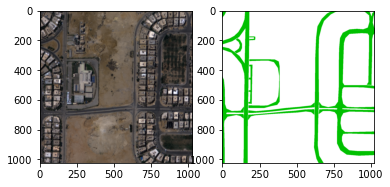

In [29]:
import matplotlib.pyplot as plt

with h5py.File('./LV1_PNG_DATASET_R.h5', 'r') as hdf5_file:
    plt.subplot(121)
    plt.imshow(hdf5_file['train']['img'][10])
    plt.subplot(122)
    plt.imshow(hdf5_file['train']['label'][10])
    plt.show()